<a href="https://colab.research.google.com/github/sarmi2325/Neural_Network/blob/main/06_MLP_from_Scratch_Multiclass_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

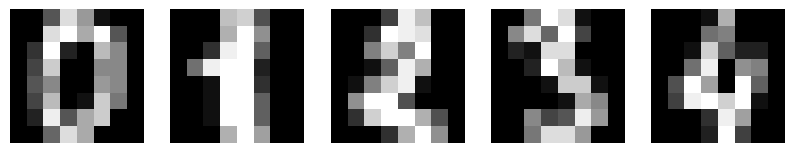

In [165]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

images=load_digits()
X=images.data
y=images.target

#visualize the images in dataset
fig,axe=plt.subplots(1,5,figsize=(10,3))
for i,ax in enumerate(axe):
  ax.imshow(images.images[i],cmap='gray')
  ax.axis("off")

In [166]:
#preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#normalize the input images
X=X/0.16    # pixel value ranges from 0 to 16

#one hot encoding for the ;abels
encoder=OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1,1))

#spliting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (1437, 64), Test shape: (360, 64)


In [167]:
#implementing the neural network from scratch
#initialization
input_size=64
hidden1_size=32
hidden2_size=16
output_size=10

#Initialize the weights and bias

W1 = np.random.randn(input_size,hidden1_size)*0.01
B1 = np.zeros((1,hidden1_size))

W2=np.random.randn(hidden1_size,hidden2_size)*0.01
B2=np.zeros((1,hidden2_size))

W3=np.random.randn(hidden2_size,output_size)*0.01
B3=np.zeros((1,output_size))

#Initializing Hyperparameters
epoch=10000
lr=0.01


In [168]:
# activation fn and its derivative function

def relu(z):
  return np.maximum(0,z)
def relu_derivative(z):
  return (z>0).astype(float)

def tanh(z):
  return np.tanh(z)
def tanh_derivative(z):
  return 1-tanh(z)**2

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # stability
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [169]:
# define forward pass fn and the loss computing fn
def forward(X):
  z1= X @ W1 +B1
  a1= relu(z1)

  z2= a1 @ W2 + B2
  a2= tanh(z2)

  z3= a2 @ W3 +B3
  y_pred=softmax(z3)

  return z1,a1,z2,a2,z3,y_pred

def loss(y_pred, y_true):
    # Cross-entropy loss
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-8)) / m
    return loss

In [170]:
#forward and backward propagation
for e in range(epoch):
  z1,a1,z2,a2,z3,y_pred = forward(X_train)
  compute_loss = loss(y_pred,y_train)

  #Backpropagation
  dLdz3 = (y_pred-y_train)/y_train.shape[0]

  dLdW3 = a2.T @ dLdz3
  dLdB3 = np.sum(dLdz3,axis=0,keepdims=True)

  dLda2 = dLdz3 @ W3.T
  dLdz2 = dLda2 * relu_derivative(z2)

  dLdW2 = a1.T @ dLdz2
  dLdB2 = np.sum(dLdz2,axis=0,keepdims=True)

  dLda1 = dLdz2 @ W2.T
  dLdz1 = dLda1 * tanh_derivative(z1)

  dLdW1 = X_train.T @ dLdz1
  dLdB1 = np.sum(dLdz1,axis=0,keepdims=True)

  #Weights and Bias update
  W1 -= lr * dLdW1
  B1 -= lr * dLdB1
  W2 -= lr * dLdW2
  B2 -= lr * dLdB2
  W3 -= lr * dLdW3
  B3 -= lr * dLdB3


  #printing the loss
  if e%1000==0:
       print(f"Epoch:{e} Loss:{compute_loss}")





Epoch:0 Loss:2.302302100178158
Epoch:1000 Loss:1.6138165707543894
Epoch:2000 Loss:1.1933788503695661
Epoch:3000 Loss:0.9920419816650089
Epoch:4000 Loss:0.8824447083258751
Epoch:5000 Loss:0.76573002624355
Epoch:6000 Loss:0.8508823269123226
Epoch:7000 Loss:0.770762106999435
Epoch:8000 Loss:0.7197946163567963
Epoch:9000 Loss:0.6528054287889294


In [176]:

# Forward pass on test data
_, _, _, _, _, y_pred_test = forward(X_test)

# Convert softmax output to class predictions
predicted_classes = np.argmax(y_pred_test, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Accuracy
accuracy = np.mean(predicted_classes == true_classes)
print(f"Test Accuracy: {accuracy * 100:.2f}%")



Test Accuracy: 75.56%
